# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-10-15 23:31:03--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-10-15 23:31:04--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip’

cus

In [2]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
  inflating: customer_shopping_data.csv  


In [3]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [4]:
# =============================================================================
# 1. CARGA Y VISTA RÁPIDA DEL DATASET
# =============================================================================

df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

Duplicados: 0
Valores nulos por columna:
 invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

Clientes únicos: 99457
Categorias únicas: 8
Malls únicos: 10

Ventas totales (sum): 251505794.25000003


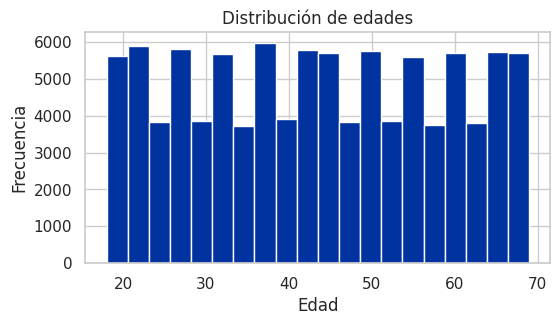

,total_amount
category,
Clothing,1.139968e+08
Shoes,6.655345e+07
Technology,5.786235e+07
Cosmetics,6.792863e+06
Toys,3.980426e+06
Food & Beverage,8.495351e+05
Books,8.345529e+05
Souvenir,6.358247e+05


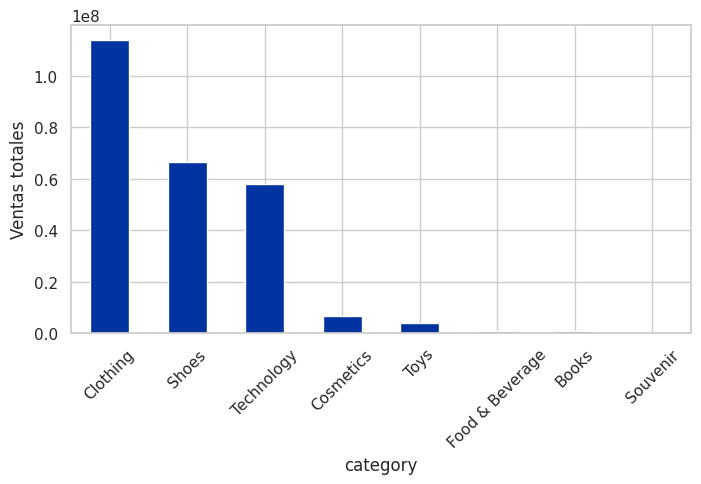

In [5]:
import matplotlib.pyplot as plt
print("Duplicados:", df.duplicated().sum())
print("Valores nulos por columna:\n", df.isna().sum())
print("\nClientes únicos:", df['customer_id'].nunique())
print("Categorias únicas:", df['category'].nunique())
print("Malls únicos:", df['shopping_mall'].nunique())
df['total_amount'] = df['quantity'] * df['price']
print("\nVentas totales (sum):", df['total_amount'].sum())
plt.figure(figsize=(6,3))
plt.hist(df['age'].dropna(), bins=20)
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()
top_cat = df.groupby('category')['total_amount'].sum().sort_values(ascending=False).head(10)
display(top_cat)
top_cat.plot(kind='bar', figsize=(8,4), rot=45)
plt.ylabel("Ventas totales")
plt.show()


## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [6]:
df = df.drop_duplicates().reset_index(drop=True)
print(df.isna().sum())
if df['age'].isna().sum() > 0:
    df['age'] = df['age'].fillna(int(df['age'].median()))
if 'gender' in df.columns and df['gender'].isna().sum() > 0:
    df['gender'] = df['gender'].fillna('Unknown')
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['total_amount'] = df['quantity'] * df['price']
df = df[~df['invoice_date'].isna()]
print("Después de limpieza:", df.shape)
display(df.isna().sum())


invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
total_amount      0
dtype: int64
Después de limpieza: (40029, 11)


,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [7]:
import datetime as dt
snapshot_date = df['invoice_date'].max() + pd.Timedelta(days=1)
rfm = df.groupby('customer_id').agg({
    'invoice_date': lambda x: (snapshot_date - x.max()).days,
    'invoice_no': 'nunique',
    'total_amount': 'sum'
}).rename(columns={'invoice_date': 'Recency_days', 'invoice_no': 'Frequency', 'total_amount': 'Monetary'})
display(rfm.describe().T)
display(rfm.sort_values('Monetary', ascending=False).head(10))


,count,mean,std,min,25%,50%,75%,max
Recency_days,40029.0,656.672637,256.877681,1.00,457.00,665.00,877.00,1066.0
Frequency,40029.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.0
Monetary,40029.0,2527.448565,4216.941539,5.23,130.75,600.17,2700.72,26250.0


,Recency_days,Frequency,Monetary
customer_id,,,
C987359,539,1,26250.0
C986474,906,1,26250.0
C700083,388,1,26250.0
C699580,484,1,26250.0
C218922,387,1,26250.0
C686700,815,1,26250.0
C685377,246,1,26250.0
C218038,969,1,26250.0
C112976,550,1,26250.0


## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

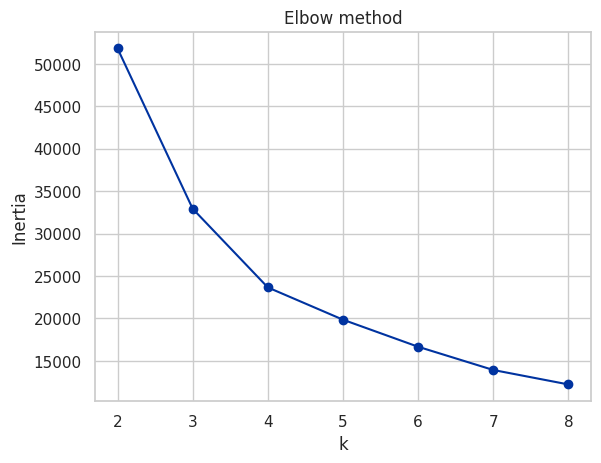

Recency_days Frequency Monetary       
              median    median   median  count
cluster                                       
0              874.0       1.0  2700.72  11061
1              454.0       1.0   130.75   9060
2              874.0       1.0   130.75   9798
3              453.0       1.0  2700.72  10110

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np


rfm_log = rfm.copy()
rfm_log['Monetary'] = rfm_log['Monetary'].apply(lambda x: np.log1p(x))
rfm_log['Frequency'] = rfm_log['Frequency'].apply(lambda x: np.log1p(x))
rfm_log['Recency_days'] = rfm_log['Recency_days']  # no log for recency
scaler = StandardScaler()
X = scaler.fit_transform(rfm_log[['Recency_days','Frequency','Monetary']])
inertia = []
K = range(2,9)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertia.append(km.inertia_)
import matplotlib.pyplot as plt
plt.plot(K, inertia, '-o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()
k_opt = 4
km = KMeans(n_clusters=k_opt, random_state=42, n_init=20)
rfm['cluster'] = km.fit_predict(X)
cluster_summary = rfm.groupby('cluster').agg({
    'Recency_days':'median',
    'Frequency':'median',
    'Monetary':['median','count']
})
display(cluster_summary)


## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

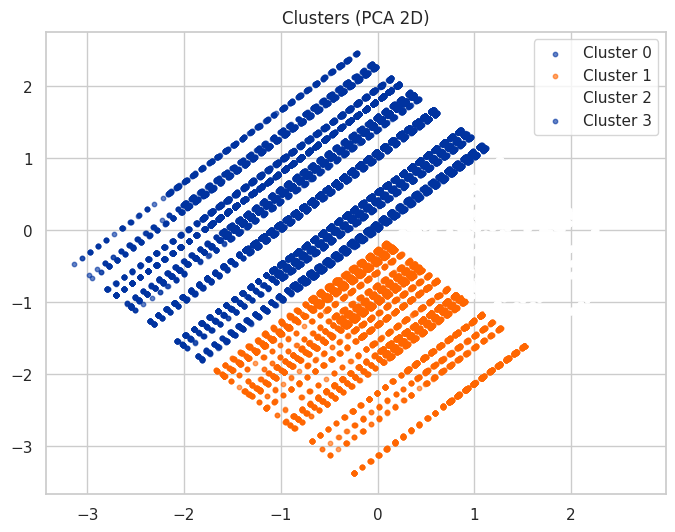

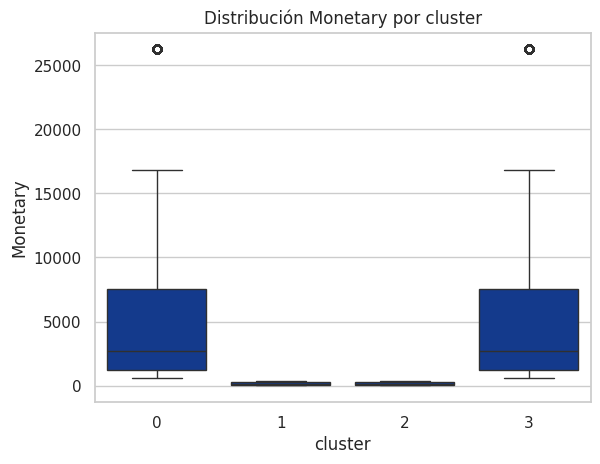

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
coords = pca.fit_transform(X)
plt.figure(figsize=(8,6))
for c in sorted(rfm['cluster'].unique()):
    idx = rfm['cluster'] == c
    plt.scatter(coords[idx,0], coords[idx,1], label=f'Cluster {c}', alpha=0.6, s=10)
plt.legend()
plt.title('Clusters (PCA 2D)')
plt.show()
import seaborn as sns
sns.boxplot(x='cluster', y='Monetary', data=rfm)
plt.title('Distribución Monetary por cluster')
plt.show()


## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

In [10]:
cust_demo = df.groupby('customer_id').agg({
    'age': 'median',
    'gender': lambda x: x.mode().iat[0] if len(x.mode())>0 else 'Unknown'
}).rename(columns={'age':'age_median','gender':'gender_mode'})

rfm_demo = rfm.merge(cust_demo, left_index=True, right_index=True, how='left')
profile = rfm_demo.groupby('cluster').agg({
    'age_median': ['median','mean'],
    'gender_mode': lambda x: x.value_counts().head(1).index[0],
    'Monetary':'median'
})
display(profile)


age_median            gender_mode Monetary
            median       mean    <lambda>   median
cluster                                           
0             43.0  43.368773      Female  2700.72
1             43.0  43.206071      Female   130.75
2             43.0  43.291998      Female   130.75
3             43.0  43.477349      Female  2700.72

## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

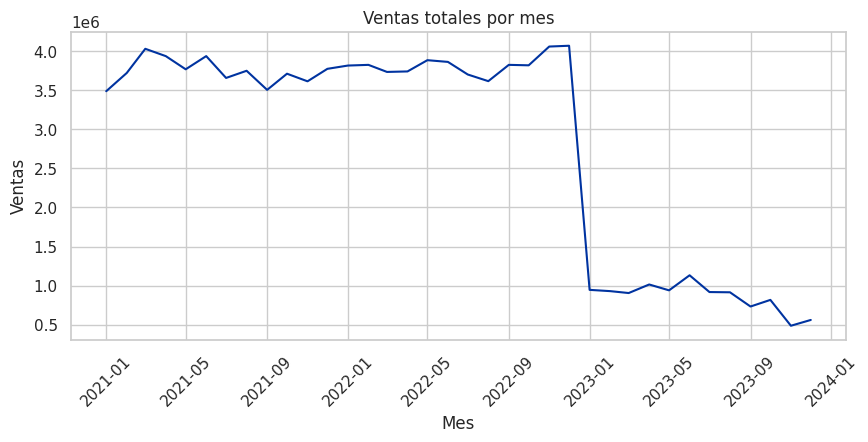

In [11]:
df['month'] = df['invoice_date'].dt.to_period('M').dt.to_timestamp()
monthly = df.groupby('month')['total_amount'].sum().reset_index()
plt.figure(figsize=(10,4))
plt.plot(monthly['month'], monthly['total_amount'])
plt.title('Ventas totales por mes')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.show()


## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

,total_amount
payment_method,
Cash,45675614.15
Credit Card,35462216.17
Debit Card,20033408.30


,total_amount
shopping_mall,
Mall of Istanbul,20651316.72
Kanyon,20431555.01
Metrocity,15126716.24
Metropol AVM,10502186.91
Istinye Park,9993243.40
Zorlu Center,5120464.65
Viaport Outlet,4888804.80
Cevahir AVM,4879357.97
Forum Istanbul,4870863.60


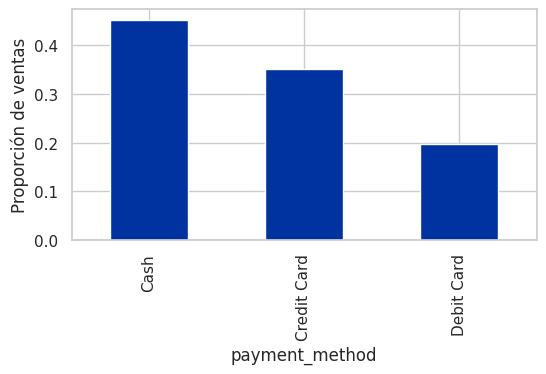

In [12]:
pay_summary = df.groupby('payment_method')['total_amount'].sum().sort_values(ascending=False)
mall_summary = df.groupby('shopping_mall')['total_amount'].sum().sort_values(ascending=False)
display(pay_summary)
display(mall_summary.head(10))
(pay_summary / pay_summary.sum()).plot(kind='bar', figsize=(6,3))
plt.ylabel('Proporción de ventas')
plt.show()


## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

In [13]:
groups = df.groupby('gender')['total_amount'].sum()
print(groups)
import scipy.stats as stats
male = df[df['gender']=='Male']['total_amount']
female = df[df['gender']=='Female']['total_amount']
male_s = male.sample(min(5000,len(male)), random_state=42)
female_s = female.sample(min(5000,len(female)), random_state=42)
tstat, pval = stats.ttest_ind(male_s, female_s, equal_var=False)
print("t-stat:", tstat, "p-value:", pval)


gender
Female    60412360.12
Male      40758878.50
Name: total_amount, dtype: float64
t-stat: -0.5920192913487686 p-value: 0.5538510590148061


## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!